<a href="https://colab.research.google.com/github/AhmedNasser1207/Virtual-Dreams/blob/main/Tomato_fruit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import losses, optimizers, layers
from keras.preprocessing import image_dataset_from_directory
from keras.applications import MobileNetV3Large
from keras.applications.mobilenet_v3 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

In [2]:
BATCH = 32
SIZE = (244, 244)

train_dir = "/content/drive/MyDrive/data/Training_set"
val_dir = "/content/drive/MyDrive/data/Testing_set"

# **Load and preprocess training dataset**

In [3]:
train_dataset = image_dataset_from_directory(
    train_dir,
    shuffle=True,
    seed=123,
    labels="inferred",
    label_mode="categorical",
    batch_size=BATCH,
    image_size=SIZE
)

Found 3592 files belonging to 5 classes.


# **Load and preprocess validation dataset**

In [4]:
val_dataset = image_dataset_from_directory(
    val_dir,
    shuffle=True,
    seed=123,
    labels="inferred",
    label_mode="categorical",
    validation_split=0.5,
    subset="validation",
    batch_size=BATCH,
    image_size=SIZE
)

Found 895 files belonging to 5 classes.
Using 447 files for validation.


# **Load the model MobileNetV3Large**

In [5]:
num_classes = len(train_dataset.class_names)

def preprocess(dataset):
    return dataset.map(lambda x, y: (preprocess_input(x), y))

pre_model = MobileNetV3Large(
    weights="imagenet",
    include_top=False,
    input_shape=(244, 244, 3)
)

/usr/local/lib/python3.11/dist-packages/keras/src/applications/mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Build the model**

In [6]:
pre_model.trainable = False

x = pre_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(num_classes, activation="softmax")(x)  # Use num_classes

model = keras.Model(inputs=pre_model.input, outputs=output)


# **Train the model**

In [8]:
model.compile(
    loss=losses.CategoricalCrossentropy(from_logits=False),
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model.fit(train_dataset, validation_data=val_dataset, epochs=35)

model.save("tomato_fruit_model.keras")
print("Model saved")

Epoch 1/35
113/113 ━━━━━━━━━━━━━━━━━━━━ 776s 7s/step - accuracy: 0.6049 - loss: 1.2971 - val_accuracy: 0.7360 - val_loss: 0.8962
Epoch 2/35
113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 122ms/step - accuracy: 0.6911 - loss: 0.9191 - val_accuracy: 0.7315 - val_loss: 0.7336
Epoch 3/35
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.7056 - loss: 0.8463 - val_accuracy: 0.7427 - val_loss: 0.7453
Epoch 4/35
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 134ms/step - accuracy: 0.7128 - loss: 0.7879 - val_accuracy: 0.7562 - val_loss: 0.6624
Epoch 5/35
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 125ms/step - accuracy: 0.7249 - loss: 0.7603 - val_accuracy: 0.7539 - val_loss: 0.7474
Epoch 6/35
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.7125 - loss: 0.7517 - val_accuracy: 0.7517 - val_loss: 0.6220
Epoch 7/35
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 122ms/step - accuracy: 0.7299 - loss: 0.7107 - val_accuracy: 0.7494 - val_loss: 0.6226
Epoch 8/35
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 125ms/step - accuracy: 0.7271 - loss: 0.7

# **Accuracy and loss graph**

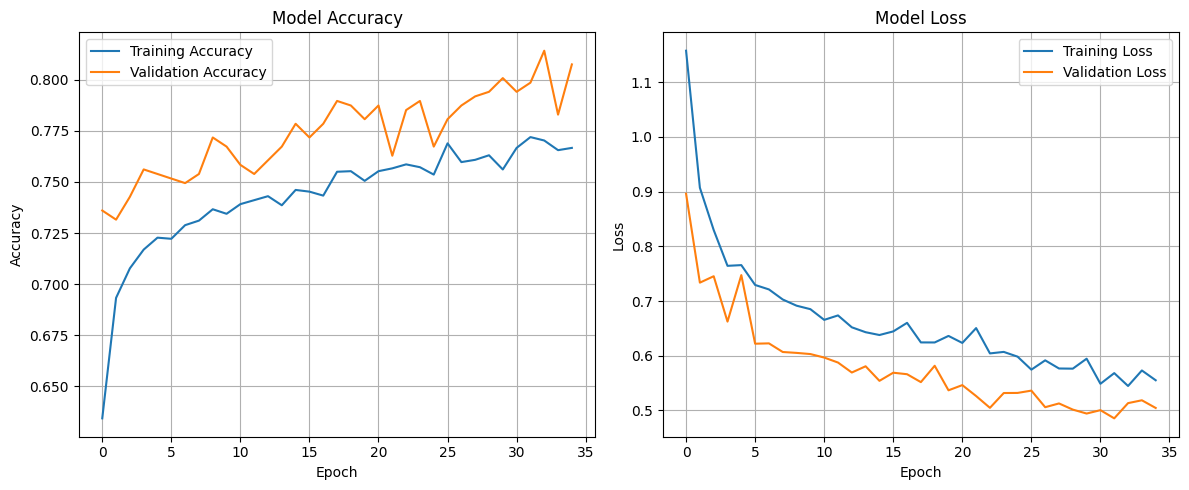

In [9]:
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


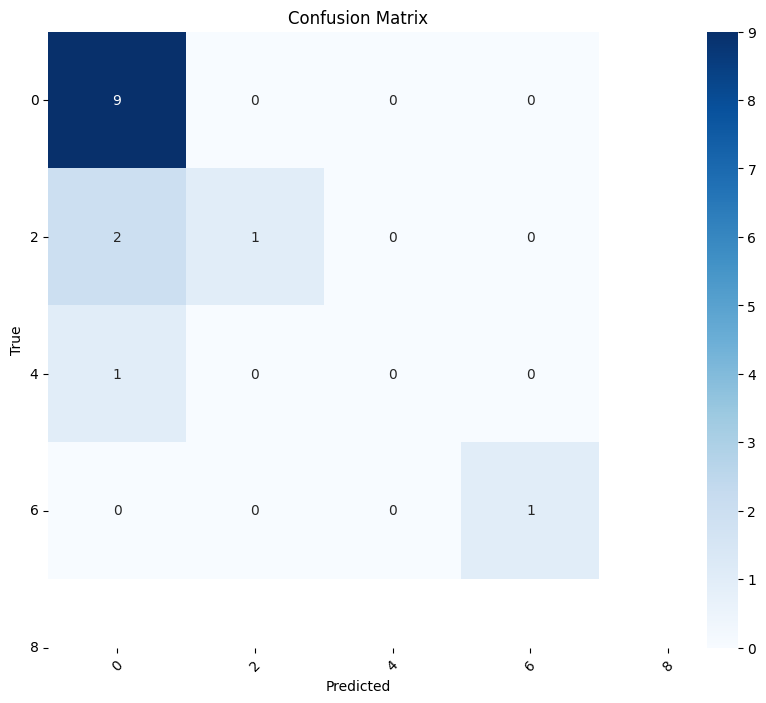

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for validation set
val_images, val_labels = next(iter(val_dataset.unbatch().batch(len(val_dataset))))
predictions = model.predict(val_images)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(val_labels, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_dataset.class_names,
            yticklabels=train_dataset.class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()